## 0. MNIST data 

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.datasets.mnist.load_data``` and read to find out how to unpack the data properly. 



In [1]:
import tensorflow.keras as keras


In [2]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?




In [4]:
# b) Check the shapes of the data
print('Shape of X_train:', X_train.shape) 
print('Shape of y_train:', y_train.shape) 
print('Shape of X_test:', X_test.shape) 
print('Shape of y_test:', y_test.shape) 

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


&nbsp; c) How many images are there in X_train?



In [5]:
print(f'Number of images in X_train',X_train.shape[0])

Number of images in X_train 60000


&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.


0 255


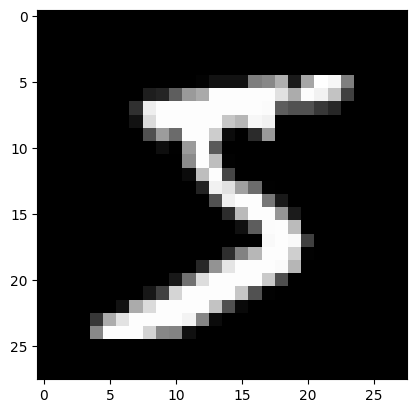

In [6]:
import matplotlib.pyplot as plt
sample_image = X_train[0]
small_value = sample_image.min()
large_value = sample_image.max()
print(small_value,large_value)

plt.imshow(sample_image, cmap='gray')
plt.show()

&nbsp; e) Plot 20 sample images. 

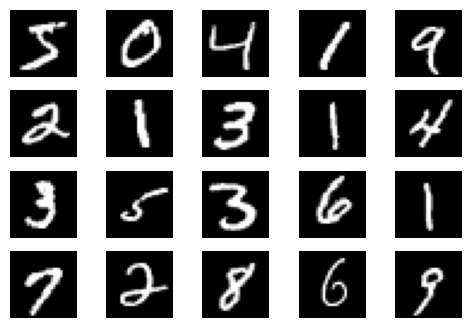

In [7]:
fig = plt.figure(figsize=(6,4))

for i, x in enumerate(range(20)):
    ax = plt.subplot(4,5,i+1)
    ax.imshow(X_train[x], cmap='gray')
    ax.axis('off')
plt.show()





&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

In [8]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print(f'New shape of X_train',X_train.shape)
print(f'New shape of X_test',X_test.shape)

New shape of X_train (60000, 784)
New shape of X_test (10000, 784)


## 1. Train|test|validation split 

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

In [9]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.16, random_state=42)

X_val.shape, X_test.shape, y_val.shape, y_test.shape

((8400, 784), (1600, 784), (8400,), (1600,))

## 2. Hyperparameter tuning 

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 


Text(0, 0.5, 'Accuracy score')

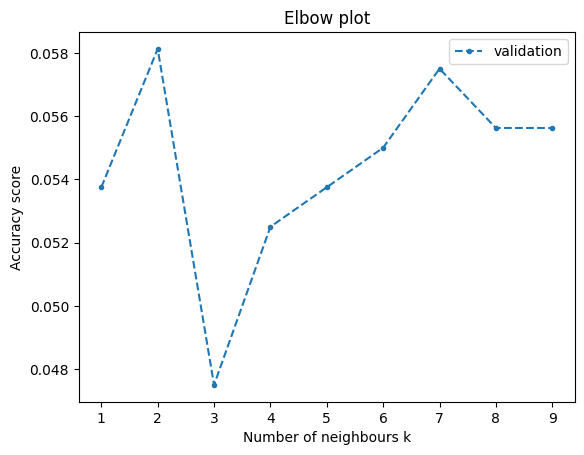

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_list = []

for k in range(1,10):
    model = KNeighborsClassifier(k)
    model.fit(X_val, y_val)
    y_pred = model.predict(X_test) # note use scaled_X_val here
    error_list.append(1-accuracy_score(y_test, y_pred))

plt.plot(range(1,10), error_list, '.--', label= 'validation')
plt.legend()
plt.title("Elbow plot")
plt.xlabel("Number of neighbours k")
plt.ylabel("Accuracy score")

## 3. Train and predict 

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

&nbsp; a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  



In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# choose a k
model = KNeighborsClassifier(9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       161
           1       0.98      1.00      0.99       177
           2       0.97      0.97      0.97       158
           3       0.97      0.97      0.97       175
           4       0.97      0.94      0.95       178
           5       0.97      0.97      0.97       128
           6       0.97      0.99      0.98       156
           7       0.94      0.99      0.96       150
           8       0.99      0.91      0.95       151
           9       0.96      0.93      0.94       166

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



&nbsp; b) Plot a confusion matrix, does this confirm your answer in a?



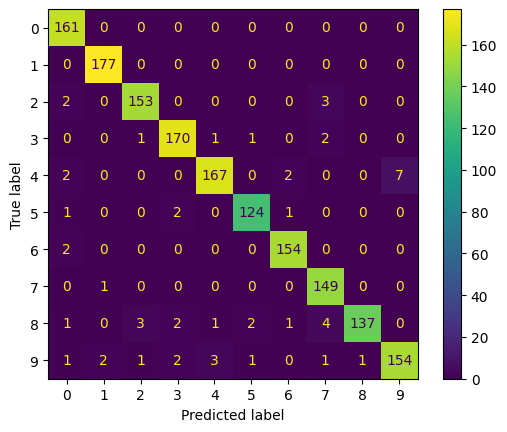

In [13]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

&nbsp; c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

In [21]:
for i in range(10):
    misclassification = sum(cm[i]) - cm[i,i]
    print(misclassification)

0
0
5
5
11
4
2
1
14
12


In [15]:
misclassifications = []
for i in range(10):
    misclassifications.append(sum(cm[i]) - cm[i,i])
print(misclassifications)


[0, 0, 5, 5, 11, 4, 2, 1, 14, 12]
